In [88]:
#Import pandas, matplotlib.pyplot, seaborn, numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.offline as pyo

In [89]:
#Cleaned data from European adult online forum 
online_data = pd.read_csv('Cap2DataWrangling_cleaned.csv')

In [90]:
#Call head method to print first several rows of data
online_data.head()

,User_ID,Gender,Age,Location,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Last_login,Days_of_membership,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Friends_ID_list,Risk,Time_spent_chatting
0,10386,male,34.6,A,Non_Verified,Homosexual,Switch,Men,50.0,10.0,1810.0,32.0,0.0,0.0,0.0,18260,0,2
1,14,male,32.2,J,Non_Verified,Heterosexual,Dominant,Women,518.0,1.0,2861.0,710.0,9.0,0.0,0.0,"11778,32024,43768,23969,27318,45884,31277",0,225
2,16721,male,33.6,K,Non_Verified,Heterosexual,Dominant,Women,150.0,3.0,1614.0,25.0,1.0,1.0,45.0,"19805,21721,19802",0,135
3,16957,male,34.0,H,Non_Verified,Heterosexual,Dominant,Women,114.0,4.0,1607.0,107.0,1.0,0.0,1.0,"40847,38183,9507,42259,5807,28118,24848,37170,...",0,21562
4,17125,male,39.5,B,Non_Verified,Heterosexual,Dominant,Women,497.0,5.0,1601.0,600.0,0.0,6.0,8.0,"1320,35739,34231,19097,20197,18069,12330,43342...",0,21


In [91]:
#Drop User_ID and Friends_ID_list to simplify data set
online_data = online_data.drop(['User_ID', 'Friends_ID_list'], axis = 1)

In [92]:
#Drop Risk=2 (aka Unknown Risks) from data set because Risk is response variable and Unknown examples aren't useful
online_data.drop(online_data.loc[online_data['Risk']==2].index, inplace=True)

In [93]:
#Reset the index
online_data.reset_index(drop=True)

,Gender,Age,Location,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Last_login,Days_of_membership,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk,Time_spent_chatting
0,male,34.6,A,Non_Verified,Homosexual,Switch,Men,50.0,10.0,1810.0,32.0,0.0,0.0,0.0,0,2
1,male,32.2,J,Non_Verified,Heterosexual,Dominant,Women,518.0,1.0,2861.0,710.0,9.0,0.0,0.0,0,225
2,male,33.6,K,Non_Verified,Heterosexual,Dominant,Women,150.0,3.0,1614.0,25.0,1.0,1.0,45.0,0,135
3,male,34.0,H,Non_Verified,Heterosexual,Dominant,Women,114.0,4.0,1607.0,107.0,1.0,0.0,1.0,0,21562
4,male,39.5,B,Non_Verified,Heterosexual,Dominant,Women,497.0,5.0,1601.0,600.0,0.0,6.0,8.0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,male,29.9,A,Non_Verified,Heterosexual,Submisive,Women,155.0,1.0,1888.0,209.0,0.0,0.0,0.0,1,46
86,male,52.3,A,Non_Verified,Heterosexual,Submisive,Women,114.0,1.0,1887.0,120.0,1.0,0.0,0.0,1,406
87,female,28.8,A,Non_Verified,bicurious,Dominant,Nobody,10.0,1.0,1885.0,11.0,0.0,0.0,0.0,1,2
88,female,34.2,L,Verified,Heterosexual,Switch,Nobody,NaN,3.0,1836.0,NaN,0.0,2.0,36.0,1,40604


In [94]:
#Confirm Risk column only includes Risk (1) and Not a Risk (0)
print(online_data['Risk'].value_counts())

0    57
1    33
Name: Risk, dtype: int64


In [95]:
#Call head on Risk individuals 
online_data.loc[online_data['Risk']==1].head(33)

,Gender,Age,Location,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Last_login,Days_of_membership,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk,Time_spent_chatting
57,male,35.7,A,Non_Verified,Heterosexual,Submisive,Women,0.0,4.0,1749.0,0.0,0.0,0.0,0.0,1,0
58,male,41.1,A,Non_Verified,Heterosexual,Submisive,Nobody_but_maybe,0.0,1.0,1725.0,1.0,1.0,0.0,0.0,1,18
59,male,49.6,A,Non_Verified,Heterosexual,Submisive,Nobody,15.0,11.0,2580.0,0.0,0.0,0.0,0.0,1,0
60,male,27.9,A,Non_Verified,bicurious,Submisive,Nobody,5.0,6.0,1697.0,0.0,0.0,0.0,0.0,1,350
61,male,52.3,E,Non_Verified,Heterosexual,Submisive,Nobody,0.0,424.0,1664.0,0.0,0.0,0.0,0.0,1,0
62,male,27.3,F,Non_Verified,Heterosexual,Submisive,Women,15.0,1.0,1573.0,0.0,1.0,0.0,0.0,1,59
63,female,45.0,A,Non_Verified,Heterosexual,Dominant,Nobody,25.0,11.0,1510.0,41.0,0.0,0.0,0.0,1,0
64,female,33.8,S,Non_Verified,bicurious,Switch,Men_and_Women,12.0,1306.0,1449.0,1.0,0.0,0.0,0.0,1,2508
65,male,35.2,B,Non_Verified,Heterosexual,Submisive,Women,0.0,1255.0,1390.0,0.0,0.0,0.0,0.0,1,0
66,male,27.3,A,Non_Verified,bicurious,Submisive,Men_and_Women,28.0,4.0,1360.0,13.0,1.0,0.0,0.0,1,0


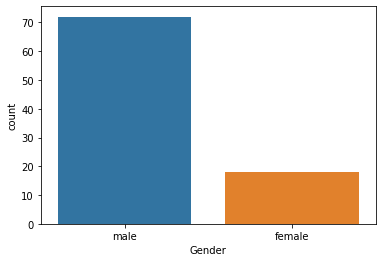

In [96]:
#Barplot to showcase gender for full data set
ax = sns.countplot(x="Gender", data=online_data)

In [97]:
#Call value_counts on gender to observe totals
print(online_data['Gender'].value_counts())

male      72
female    18
Name: Gender, dtype: int64


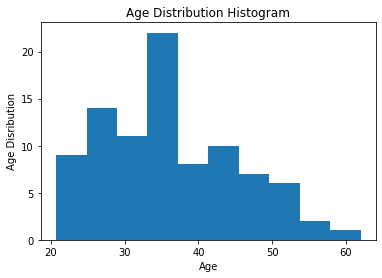

In [98]:
#Plot histogram of ages of users
plt.hist(online_data['Age'])
plt.xlabel("Age")
plt.ylabel("Age Disribution")
plt.title("Age Distribution Histogram")
plt.show()

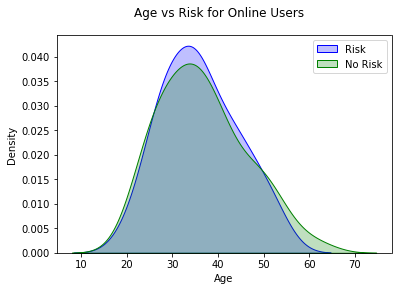

In [99]:
#Plot age differences between Risk and No Risk individuals
fig, ax = plt.subplots()

sns.kdeplot(online_data[online_data["Risk"]==1]["Age"], shade=True, color="blue", label="Risk", ax=ax)
sns.kdeplot(online_data[online_data["Risk"]==0]["Age"], shade=True, color="green", label="No Risk", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs Risk for Online Users")

ax.legend();

In [100]:
#Call describe to see summary statistics of ages
online_data['Age'].describe()

count    90.000000
mean     36.348889
std       9.069336
min      20.700000
25%      28.975000
50%      35.400000
75%      41.925000
max      62.000000
Name: Age, dtype: float64

In [101]:
#Call value_counts on location to observe totals
print (online_data['Location'].value_counts())

A    30
B    12
L     8
F     7
E     7
K     6
J     5
H     4
C     3
M     3
S     2
O     1
G     1
N     1
Name: Location, dtype: int64


In [102]:
#Observe row for A kraj location
online_data[online_data['Location'] == 'A kraj']


,Gender,Age,Location,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Last_login,Days_of_membership,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk,Time_spent_chatting


In [103]:
#Observe row for South Moravian location
online_data[online_data['Location'] == 'South Moravian']

,Gender,Age,Location,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Last_login,Days_of_membership,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk,Time_spent_chatting


In [104]:
#Observe row for Jihomoravsk_ý kraj location
online_data[online_data['Location'] == 'Jihomoravsk_ý kraj']

,Gender,Age,Location,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Last_login,Days_of_membership,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk,Time_spent_chatting


In [105]:
#Update values for A kraj, South Moravian, Jihomoravsk_ý kraj to match existing location values
online_data['Location'] = online_data['Location'].replace(['A kraj'],'A')
online_data['Location'] = online_data['Location'].replace(['South Moravian'],'S')
online_data['Location'] = online_data['Location'].replace(['Jihomoravsk_ý kraj'],'J')

In [106]:
#Confirm location values for are updated for A kraj, South Moravian, Jihomoravsk_ý kraj
print(online_data['Location'].value_counts())

A    30
B    12
L     8
F     7
E     7
K     6
J     5
H     4
C     3
M     3
S     2
O     1
G     1
N     1
Name: Location, dtype: int64


In [107]:
#Call value_counts on verification to observe totals
print(online_data['Verification'].value_counts())

Non_Verified     74
Verified         15
Administrator     1
Name: Verification, dtype: int64


In [108]:
#Call value_counts on sexual orientation to observe totals
print(online_data['Sexual_orientation'].value_counts())

Heterosexual    69
bicurious       10
bisexual         7
Homosexual       3
Name: Sexual_orientation, dtype: int64


In [109]:
#Create new dataframe specifically for risk individuals to perform EDA
online_risk = online_data[online_data['Risk'] == 1]

In [110]:
#Reset the index of the risk dataframe
online_risk.reset_index(drop=True)

,Gender,Age,Location,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Last_login,Days_of_membership,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk,Time_spent_chatting
0,male,35.7,A,Non_Verified,Heterosexual,Submisive,Women,0.0,4.0,1749.0,0.0,0.0,0.0,0.0,1,0
1,male,41.1,A,Non_Verified,Heterosexual,Submisive,Nobody_but_maybe,0.0,1.0,1725.0,1.0,1.0,0.0,0.0,1,18
2,male,49.6,A,Non_Verified,Heterosexual,Submisive,Nobody,15.0,11.0,2580.0,0.0,0.0,0.0,0.0,1,0
3,male,27.9,A,Non_Verified,bicurious,Submisive,Nobody,5.0,6.0,1697.0,0.0,0.0,0.0,0.0,1,350
4,male,52.3,E,Non_Verified,Heterosexual,Submisive,Nobody,0.0,424.0,1664.0,0.0,0.0,0.0,0.0,1,0
5,male,27.3,F,Non_Verified,Heterosexual,Submisive,Women,15.0,1.0,1573.0,0.0,1.0,0.0,0.0,1,59
6,female,45.0,A,Non_Verified,Heterosexual,Dominant,Nobody,25.0,11.0,1510.0,41.0,0.0,0.0,0.0,1,0
7,female,33.8,S,Non_Verified,bicurious,Switch,Men_and_Women,12.0,1306.0,1449.0,1.0,0.0,0.0,0.0,1,2508
8,male,35.2,B,Non_Verified,Heterosexual,Submisive,Women,0.0,1255.0,1390.0,0.0,0.0,0.0,0.0,1,0
9,male,27.3,A,Non_Verified,bicurious,Submisive,Men_and_Women,28.0,4.0,1360.0,13.0,1.0,0.0,0.0,1,0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: Future

<AxesSubplot:xlabel='Looking_for', ylabel='count'>

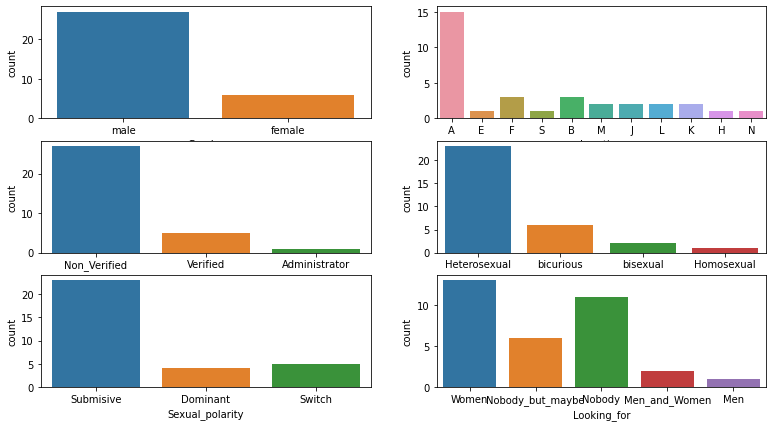

In [111]:
#Countplots to showcase different categories of risk users
fig_dims = (13, 7)
fig, ax = plt.subplots(3,2, figsize=fig_dims)
sns.countplot(online_risk['Gender'], ax=ax[0,0])
sns.countplot(online_risk['Location'], ax=ax[0,1])
sns.countplot(online_risk['Verification'], ax=ax[1,0])
sns.countplot(online_risk['Sexual_orientation'], ax=ax[1,1])
sns.countplot(online_risk['Sexual_polarity'], ax=ax[2,0])
sns.countplot(online_risk['Looking_for'], ax=ax[2,1])

Looking at the above graphs, it's clear that the typical profile of a risk individual is: male, lives in location A, is non-verified, heterosexual, submissive, and looking for women.

In [112]:
#Create new dataframe specifically for non-risk individuals
online_norisk = online_data[online_data['Risk'] == 0]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: Future

<AxesSubplot:xlabel='Looking_for', ylabel='count'>

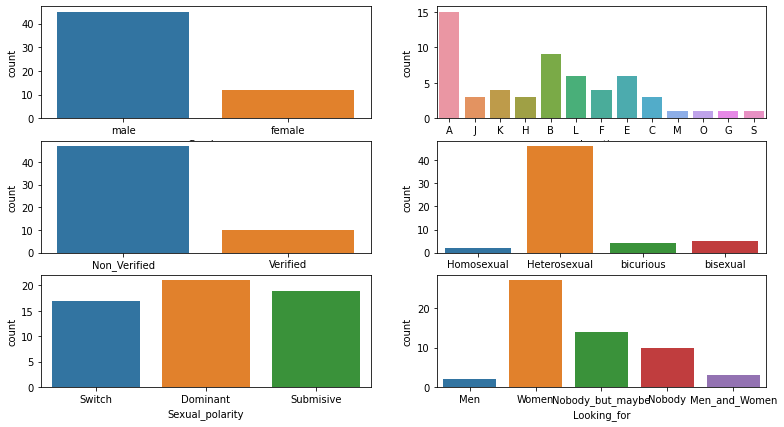

In [113]:
#Countplots to showcase different categories of non-risk users
fig_dims = (13, 7)
fig, ax = plt.subplots(3,2, figsize=fig_dims)
sns.countplot(online_norisk['Gender'], ax=ax[0,0])
sns.countplot(online_norisk['Location'], ax=ax[0,1])
sns.countplot(online_norisk['Verification'], ax=ax[1,0])
sns.countplot(online_norisk['Sexual_orientation'], ax=ax[1,1])
sns.countplot(online_norisk['Sexual_polarity'], ax=ax[2,0])
sns.countplot(online_norisk['Looking_for'], ax=ax[2,1])

Comparing the two sets of plots, it's clear that risk individuals have a higher percentage of users who are submissive compared to non-risk individuals who are more evenly distributed between switch, dominant, and submissive.

In [114]:
#View the risk summary statistics for numeric values
online_risk[["Points_Rank", "Last_login", "Days_of_membership", "Number_of_Comments_in_public_forum", "Number_of_advertisments_posted", "Number_of_offline_meetings_attended", "Profile_pictures", "Time_spent_chatting"]].describe()

,Points_Rank,Last_login,Days_of_membership,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Time_spent_chatting
count,32.000000,33.000000,33.000000,31.000000,33.000000,33.000000,33.000000,33.000000
mean,101.875000,94.272727,1338.545455,60.903226,0.242424,0.090909,3.969697,2852.424242
std,168.647131,314.678236,746.115947,133.619448,0.435194,0.384353,10.684349,8888.829591
min,0.000000,1.000000,142.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.500000,1.000000,622.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,3.000000,1449.000000,4.000000,0.000000,0.000000,0.000000,2.000000
75%,79.500000,6.000000,1885.000000,39.500000,0.000000,0.000000,0.000000,350.000000
max,664.000000,1306.000000,3036.000000,644.000000,1.000000,2.000000,48.000000,40604.000000


In [115]:
#View the no risk summary statistics for numeric values
online_norisk[["Points_Rank", "Last_login", "Days_of_membership", "Number_of_Comments_in_public_forum", "Number_of_advertisments_posted", "Number_of_offline_meetings_attended", "Profile_pictures", "Time_spent_chatting"]].describe()

,Points_Rank,Last_login,Days_of_membership,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Time_spent_chatting
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,111.385965,36.842105,1298.210526,118.859649,0.789474,0.771930,3.964912,6864.298246
std,150.305849,116.695083,755.361780,200.140972,2.561646,2.187771,9.124075,21693.828913
min,-26.000000,1.000000,139.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,1.000000,715.000000,1.000000,0.000000,0.000000,0.000000,4.000000
50%,50.000000,3.000000,1460.000000,43.000000,0.000000,0.000000,0.000000,135.000000
75%,150.000000,9.000000,1833.000000,107.000000,1.000000,0.000000,3.000000,2724.000000
max,564.000000,725.000000,2861.000000,845.000000,17.000000,11.000000,45.000000,136350.000000


Interestingly, looking at the statistics between risk individuals and non-risk individuals, on average, risk individuals are less active on the platform across multiple categories, including number of comments made ina  public forum, number of advertisements posted, number of offline meetings attended, and time spent chatting.

In [116]:
#Call value_counts on number of advertisements posted to observe values
online_data['Number_of_advertisments_posted'].value_counts() 

0.0     67
1.0     16
2.0      4
3.0      1
17.0     1
9.0      1
Name: Number_of_advertisments_posted, dtype: int64

In [117]:
#Call value_counts on number of offline meetings attended to observe values
online_data['Number_of_offline_meetings_attended'].value_counts() 

0.0     79
2.0      2
3.0      2
1.0      2
4.0      1
5.0      1
11.0     1
9.0      1
6.0      1
Name: Number_of_offline_meetings_attended, dtype: int64

In [118]:
#Call value_counts on profile_pictures to observe values
online_data['Profile_pictures'].value_counts() 

0.0     59
1.0      5
2.0      4
5.0      3
3.0      2
4.0      2
11.0     2
7.0      2
33.0     2
10.0     1
6.0      1
48.0     1
25.0     1
16.0     1
8.0      1
19.0     1
45.0     1
36.0     1
Name: Profile_pictures, dtype: int64

In [119]:
#Drop four columns (advertisements, offline meetings, and profile pictures) because numeric values are so low across both sets of risk and no risk individuals
online_data = online_data.drop(['Number_of_advertisments_posted', 'Number_of_offline_meetings_attended', 'Profile_pictures'], axis = 1)

In [122]:
#Drop last login and days of membership columns ecause neither are qualities of user behavior which would indicate an at risk individual
online_data = online_data.drop(['Last_login', 'Days_of_membership'], axis = 1)

In [123]:
online_data.head()

,Gender,Age,Location,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Number_of_Comments_in_public_forum,Risk,Time_spent_chatting
0,male,34.6,A,Non_Verified,Homosexual,Switch,Men,50.0,32.0,0,2
1,male,32.2,J,Non_Verified,Heterosexual,Dominant,Women,518.0,710.0,0,225
2,male,33.6,K,Non_Verified,Heterosexual,Dominant,Women,150.0,25.0,0,135
3,male,34.0,H,Non_Verified,Heterosexual,Dominant,Women,114.0,107.0,0,21562
4,male,39.5,B,Non_Verified,Heterosexual,Dominant,Women,497.0,600.0,0,21


In [124]:
online_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Gender                              90 non-null     object 
 1   Age                                 90 non-null     float64
 2   Location                            90 non-null     object 
 3   Verification                        90 non-null     object 
 4   Sexual_orientation                  89 non-null     object 
 5   Sexual_polarity                     89 non-null     object 
 6   Looking_for                         89 non-null     object 
 7   Points_Rank                         89 non-null     float64
 8   Number_of_Comments_in_public_forum  88 non-null     float64
 9   Risk                                90 non-null     int64  
 10  Time_spent_chatting                 90 non-null     int64  
dtypes: float64(3), int64(2), object(6)
memory usage